# Análise Exploratória de Dados (EDA: _Exploratory Data Analysis_)

* Variáveis qualitativas (`categóricas`): Descreve os dados por categorias ou características sem uma ordem natural
   
    - Dicotômico: Dois valores possíveis: (sim | não), (verdadeiro | falso)
   
    - Politômica: Permite vários valores, de modo que ao selecionar um dos valores, automaticamente os demais são omitidos: Níveis, Ordem, etc

*  Variáveis quantitativas (`não-categóricas`):Descreve os dados numéricos, representando uma quantidade mensurável

    - Discreta: Não permitem o uso de valores intermediários ou decimais: Idade, Hora, Minutos, Mês (número), Dia do mês, etc

    - Contínua: Existem valores intermediários: Salário, Peso (depende da precisão), Preços, Área, Volume, etc 



    Bibliotecas

Utilize `!pip` caso execute o código no Colab, ou `%pip` caso execute o código VSCode ou Jupyter

In [ ]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install missingno
%pip install sklearn

In [1]:
# Importar bibliotecas relevantes

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g., pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

from sklearn.preprocessing import MinMaxScaler # Padronização dos dados
from sklearn.preprocessing import LabelEncoder # Codificação das variáveis categóricas

%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

    Sobre a base de dados

    Descrição das variáveis:

![Titanic Ticket](https://www.encyclopedia-titanica.org/images/ticket_example.jpg?ezimgfmt=ng%3Awebp%2Fngcb35%2Frs%3Adevice%2Frscb35-1)

    - pclass    Classe dos passageiros (1 = 1st; 2 = 2nd; 3 = 3rd)
    - survival  Sobrevivente (0 = No; 1 = Yes)
    - name      Nome
    - sex       Sexo
    - age       Idade
    - sibsp     Número de Irmãos/cônjuges a bordo
    - parch     Número de pais/filhos a bordo
    - ticket    Número do Ticket
    - fare      Tarifa (British pound)
    - cabin     Cabine
    - embarked  Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
    - boat      Bote salva-vidas
    - body      Número de identificação do corpo
    - home.dest Destino

Fonte: Hind, Philip. Encyclopedia Titanica. Online-only resource. Retrieved 01Feb2012 from http://www.encyclopedia-titanica.org/


    Abrindo a base de dados (dataset)

In [5]:
# Caminho do arquivo
path = './BasedeDadosPNS-2019/PNS2019-violencia.csv'
violencia = pd.read_csv(path, sep=',', encoding='utf-8')

In [32]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# Tipos de cada variável

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
# Verificar a descrição dos dados

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA ou Análise de Dados Exploratória

    Correlação entre as variáveis/características/atributos (Correlation Data)

In [36]:
df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_7252\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_7252\2268453977.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=True, cmap='YlGnBu')


<AxesSubplot: >

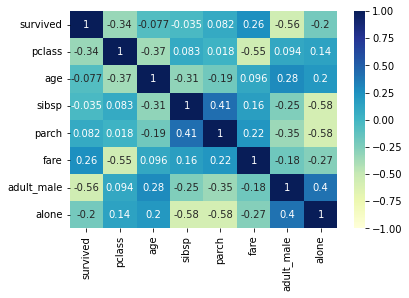

In [37]:
sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=True, cmap='YlGnBu')
#sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=True, cmap='YlGnBu', mask=np.triu(np.ones_like(df.corr()))) # Triangular inferior apenas

In [38]:
# Correlação da variável 'survived' em relação as demais

df.corrwith(df["survived"])

C:\Users\admin\AppData\Local\Temp\ipykernel_7252\3447030597.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["survived"])


survived    1.000000
pclass     -0.338481
age        -0.077221
sibsp      -0.035322
parch       0.081629
fare        0.257307
dtype: float64

C:\Users\admin\AppData\Local\Temp\ipykernel_7252\3739580420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.bar(dict(df.corrwith(df["survived"])).keys(), dict(df.corrwith(df["survived"])).values())
C:\Users\admin\AppData\Local\Temp\ipykernel_7252\3739580420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.bar(dict(df.corrwith(df["survived"])).keys(), dict(df.corrwith(df["survived"])).values())


<BarContainer object of 6 artists>

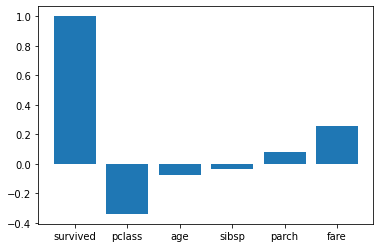

In [39]:
plt.bar(dict(df.corrwith(df["survived"])).keys(), dict(df.corrwith(df["survived"])).values())

In [40]:
# Correlação entre duas variáveis

df[['age','survived']].corr()

,age,survived
age,1.000000,-0.077221
survived,-0.077221,1.000000


    Dados Ausentes (Missing Data)

In [41]:
# Verifica se existe valor ausente em apenas uma variável

any(df['age'].isna())

True

In [42]:
# Verificando valores ausentes (NaN) nas variáveis, com exceção dos atributos: 'PassengerId' e 'Name'

print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()))

Valores ausentes (NaN) em:
survived : False
pclass : False
sex : False
age : True
sibsp : False
parch : False
fare : False
embarked : True
class : False
who : False
adult_male : False
deck : True
embark_town : True
alive : False
alone : False


In [43]:
# Quantos dados ausentes tem a variável 'age'?

df['age'].isnull().sum()

177

In [44]:
# Quantos dados ausentes tem a variável 'embark_town'?

df['embark_town'].isnull().sum()

2

    Dados Desbanlanceados (Imbalanced Dataset)

In [45]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot: xlabel='survived', ylabel='count'>

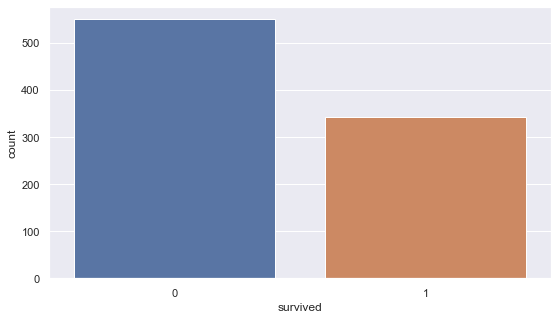

In [46]:
sns.set()
sns.set(rc = {'figure.figsize':(9,5)})
sns.countplot(x="survived",data=df)

    Medidas de tendência central

* Lembrando:
    - Média: Soma de todos os valores dividido pela quantidade de observações
    - Mediana: Valor central em sequência ordenada
    - Moda: Valor mais frequente em uma sequência

In [47]:
# Média de idade masculina e feminina

df.groupby('sex')['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [48]:
# Valor do ticket em 95% dos tickets vendidos

print('Max:', df['fare'].max(), '-> IQR:', df['fare'].quantile(0.95))

Max: 512.3292 -> IQR: 112.07915


In [49]:
# Idade da maior parte dos passageiros
 
df['age'].mode()

0    24.0
Name: age, dtype: float64

In [50]:
# A mediana de idade em cada classe

df.groupby('pclass')['age'].median()

pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

In [51]:
# Porcentagem de passageiros em cada classe
 
(df['pclass'].value_counts()/len(df))*100

3    55.106622
1    24.242424
2    20.650954
Name: pclass, dtype: float64

    Medidas de Dispersão

In [52]:
# Variabilidade de cada variável

df.std()

C:\Users\admin\AppData\Local\Temp\ipykernel_7252\1894244007.py:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

In [53]:
# Porcentagem da variação de idade por classe

(df.groupby('pclass')['age'].std() / df.groupby('pclass')['age'].mean()) * 100

pclass
1    38.717038
2    46.861404
3    49.702029
Name: age, dtype: float64

In [54]:
# As classes que tiveram mais variabilidade de sobreviventes

df.groupby('pclass')['survived'].std().sort_values(ascending= False)

pclass
2    0.500623
1    0.484026
3    0.428949
Name: survived, dtype: float64

    Distribuição dos Dados

In [55]:
def dist_Attribute(data, columns):
    sns.countplot(data=data, x=columns)
    plt.xticks(rotation=90)
    plt.show()
    print('Frequente:',data[columns].mode()[0])

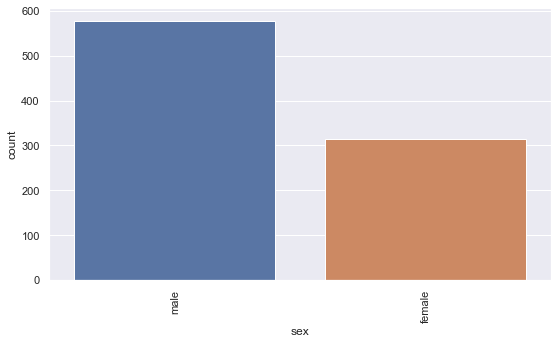

Frequente: male


In [56]:
dist_Attribute(df, 'sex')

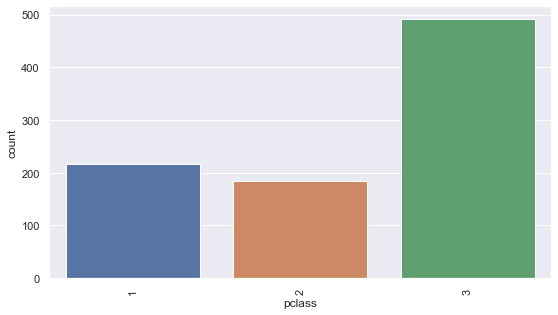

Frequente: 3


In [57]:
dist_Attribute(df, 'pclass')

In [58]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


survived : 0.4785234382949897
pclass : -0.6305479068752845
age : 0.38910778230082704
sibsp : 3.6953517271630565
parch : 2.7491170471010933
fare : 4.787316519674893


<Figure size 1440x1080 with 0 Axes>

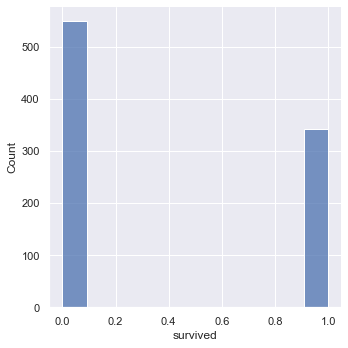

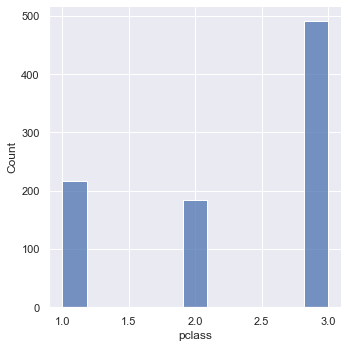

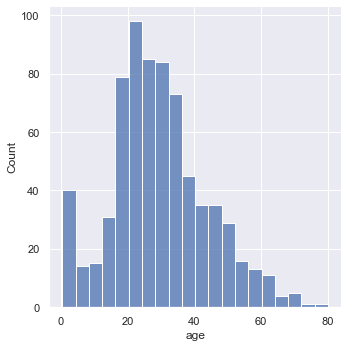

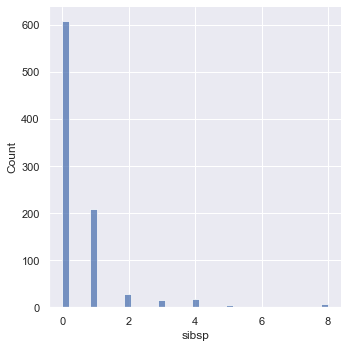

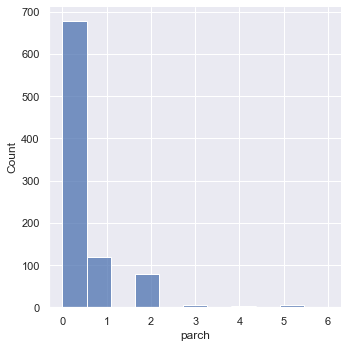

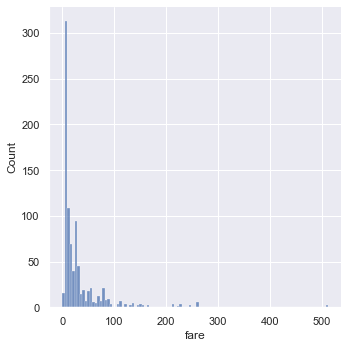

In [59]:
# Verificar as distribuições normais entre as variáveis contínuas

plt.figure(figsize=(20,15))
j=1
for i in df.columns:
    if df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
        sns.displot(df[i])
        #plt.subplot(2,3,j)
        j+=1
        print(df[i].name, ':', df[i].skew())
#plt.tight_layout()
plt.show()

S    644
C    168
Q     77
Name: embarked, dtype: int64


<AxesSubplot: >

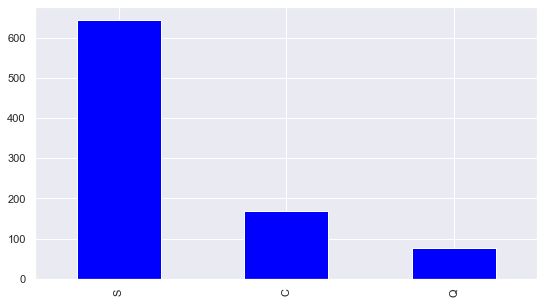

In [60]:
# Número de passageiros embarcados em cada porto

print(df['embarked'].value_counts())
df['embarked'].value_counts().plot(kind='bar',color='blue')

C:\Users\admin\AppData\Local\Temp\ipykernel_7252\1947479951.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Density plot')

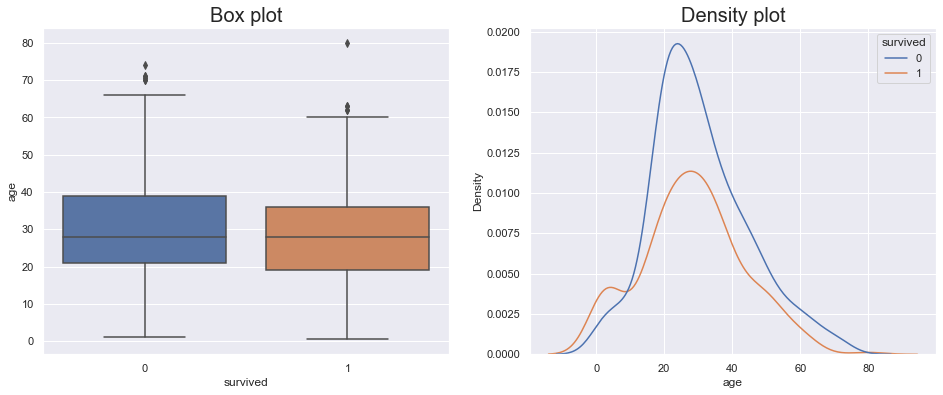

In [61]:
sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

# Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x="survived", y="age", data=df)
bp_ax.set_title('Box plot', fontsize = 20)

# Função Densidade de Probabilidade
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x='age', hue='survived', data=df)
dp_ax.set_title('Density plot', fontsize = 20)

# Boxplots: Distribuição do atributo (age) para cada classe de saída (survived), além de fornecer informações sobre os outliers
# Gráficos de densidade : Distribuição e a forma da distribuição (semelhante a normal ou qualquer outra distribuição) do atributo
# Gráficos de contagem empilhados: Informa sobre a contagem de cada categoria do atributo, e com informações sobre a porcentagem de cada categoria

In [62]:
def plot_stacked_plot_percentages(class_list, df_p, add_x_val):
    
    '''This function adds the percentage in each stacked plot
    class_list : contains three params, count of each rect/class, total for that rect/class, ax object of that rect/class
    df_p : df.axes.patches object for each rectange
    add_x_val : x axis value to center the text
    '''
    
    for class_val in class_list:
        
        percentage = (class_val[0]/class_val[1])*100
        height = class_val[2].get_height() 
        df_p.axes.text(class_val[2].get_x()+add_x_val, height,"{:1.1f}%".format(percentage))

In [63]:
def calculate_stacked_plot_percentages(df_plot, df_p):
    df_plot_sum = df_plot.sum(axis=1)
    class_sum = np.array([df_plot_sum.iloc[int(i/2)] if i%2==0 else df_plot_sum.iloc[int((i-1)/2)] for i in range(2*len(df_plot_sum)) ]).reshape((len(df_plot_sum),2)).T.flatten()
    class_list = zip(np.roll(df_plot.to_numpy().T.flatten(), len(df_plot)), class_sum, list(df_p.axes.patches))

    return class_list

survived        0    1
age_bin               
(0.0, 27.0]   189  130
(27.0, 53.0]  201  144
(53.0, 80.0]   34   16


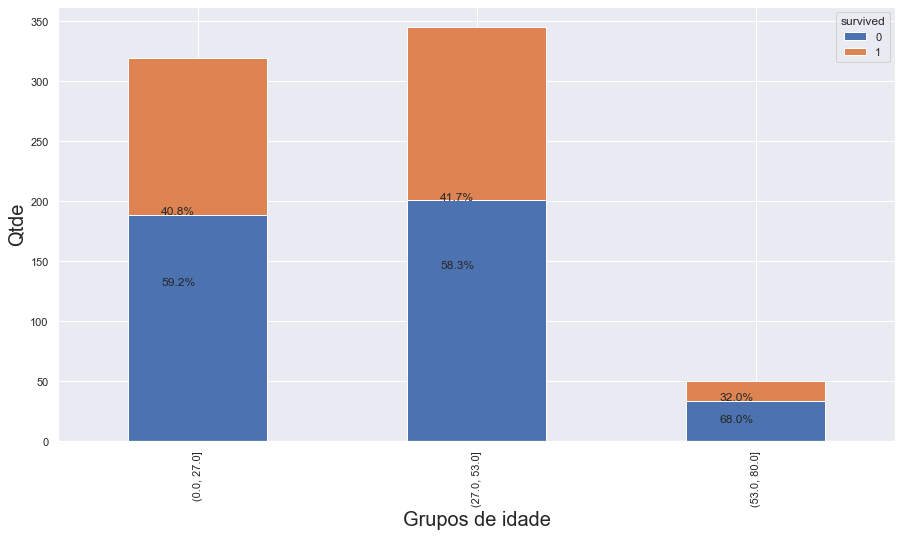

In [64]:
sns.set(rc = {'figure.figsize':(15,8)})

# Encontrando as faixas
df['age_bin'] = pd.cut(df['age'], 3, precision=0)

# Cálculo a contagem de variável categórica 'survived' para diferentes faixas etárias
df_plot = df.groupby([ 'survived', 'age_bin']).size().reset_index().pivot(columns='survived', index='age_bin', values=0)
print(df_plot)

# Gráfico de barra empilhada
df_p = df_plot.plot(kind='bar', stacked=True)

# Defina os rótulos
df_p.set_xlabel("Grupos de idade", fontsize = 20)
df_p.set_ylabel("Qtde", fontsize = 20)

class_list = calculate_stacked_plot_percentages(df_plot, df_p)

plot_stacked_plot_percentages(class_list, df_p, 0.12)

    Padronização dos dados

<AxesSubplot: >

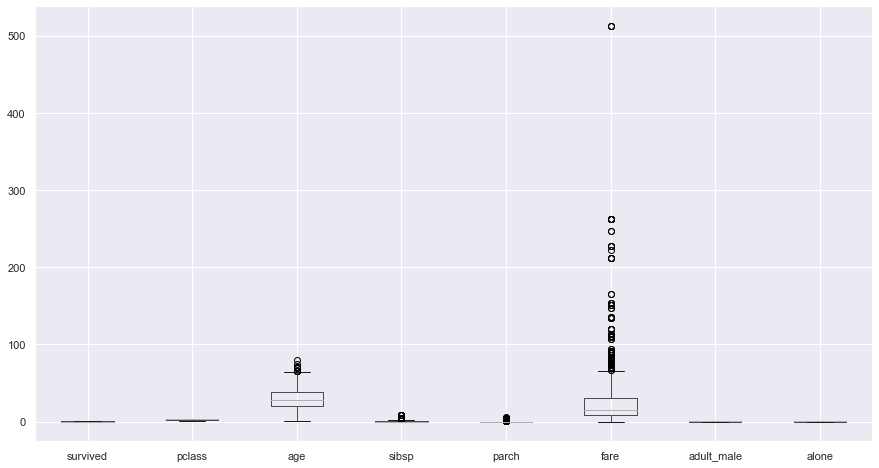

In [65]:
# Boxplot de todos os atributos contínuos antes da padronização

df.boxplot()

In [66]:
categorical_features = ['sex', 'pclass', 'embarked' ]
numerical_features = ['age', 'sibsp', 'parch', 'fare', 'family','name_length']

for col in categorical_features:
    if col in df.columns:
        try:
            le = LabelEncoder()
            df[col]= le.fit_transform(X[col])
        except:
            pass

for col in numerical_features:
    le = MinMaxScaler()
    if col in df.columns:
        df[col]= le.fit_transform(np.array(df[col]).reshape(-1,1))

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,0.271174,0.125,0.000000,0.014151,S,Third,man,True,NaN,Southampton,no,False,"(0.0, 27.0]"
1,1,1,female,0.472229,0.125,0.000000,0.139136,C,First,woman,False,C,Cherbourg,yes,False,"(27.0, 53.0]"
2,1,3,female,0.321438,0.000,0.000000,0.015469,S,Third,woman,False,NaN,Southampton,yes,True,"(0.0, 27.0]"
3,1,1,female,0.434531,0.125,0.000000,0.103644,S,First,woman,False,C,Southampton,yes,False,"(27.0, 53.0]"
4,0,3,male,0.434531,0.000,0.000000,0.015713,S,Third,man,True,NaN,Southampton,no,True,"(27.0, 53.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0.000,0.000000,0.025374,S,Second,man,True,NaN,Southampton,no,True,"(27.0, 53.0]"
887,1,1,female,0.233476,0.000,0.000000,0.058556,S,First,woman,False,B,Southampton,yes,True,"(0.0, 27.0]"
888,0,3,female,NaN,0.125,0.333333,0.045771,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,0.321438,0.000,0.000000,0.058556,C,First,man,True,C,Cherbourg,yes,True,"(0.0, 27.0]"


    Detecção de Outliers

<AxesSubplot: >

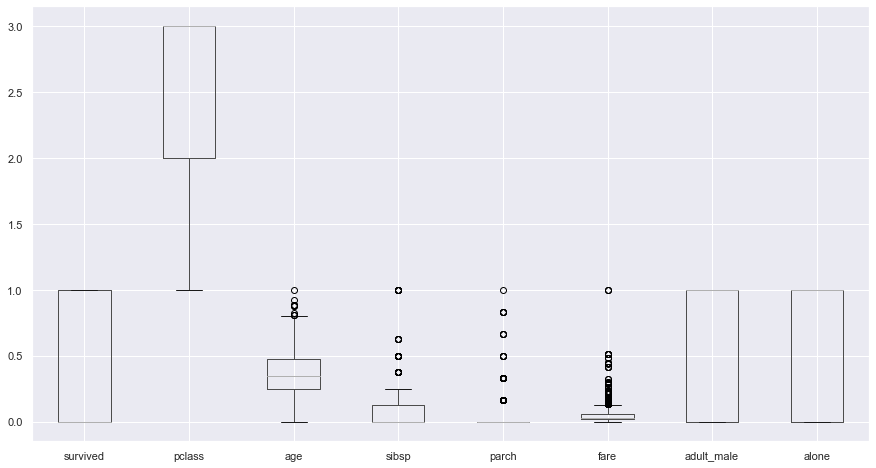

In [67]:
# Boxplot de todos os atributos contínuos

df.boxplot()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

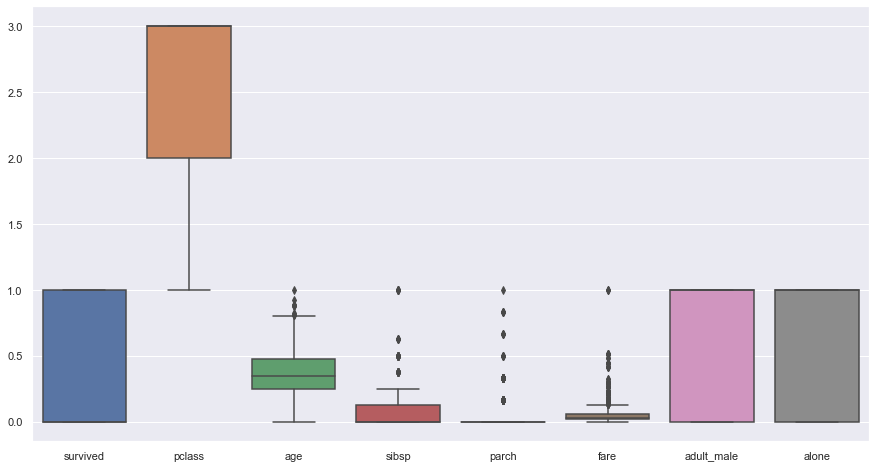

In [68]:
# Boxplot de todos os atributos contínuos usando a biblioteca seaborn

sns.boxplot(data=df)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

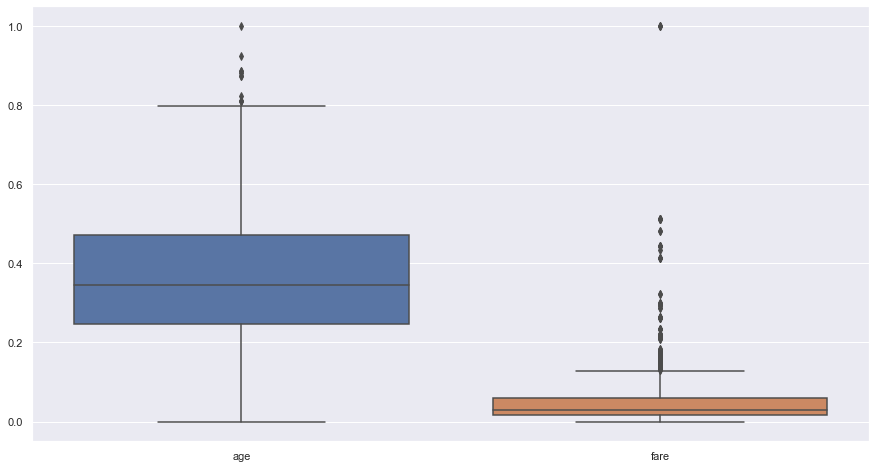

In [69]:
df1 = df[['age','fare']]
sns.boxplot(data=df1)

In [70]:
# Eliminar outliers dos dados depois de analisar com boxplot

def drop_outliers(data , col):
    Q1 = data['age'].quantile(0.25)
    Q3 = data['age'].quantile(0.75)
    IQR = Q3 - Q1 # IQR significa Interquartile Range 

    filter = (data['age'] >= Q1 - 1.5 * IQR) & (data['age'] <= Q3 + 1.5 *IQR) # Filtro  dentro de Q1 - 1.5*IQR até Q3 + 1.5*IQR
    data = data.loc[filter]
    return data

drop_outliers(df, 'fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,0.271174,0.125,0.000000,0.014151,S,Third,man,True,NaN,Southampton,no,False,"(0.0, 27.0]"
1,1,1,female,0.472229,0.125,0.000000,0.139136,C,First,woman,False,C,Cherbourg,yes,False,"(27.0, 53.0]"
2,1,3,female,0.321438,0.000,0.000000,0.015469,S,Third,woman,False,NaN,Southampton,yes,True,"(0.0, 27.0]"
3,1,1,female,0.434531,0.125,0.000000,0.103644,S,First,woman,False,C,Southampton,yes,False,"(27.0, 53.0]"
4,0,3,male,0.434531,0.000,0.000000,0.015713,S,Third,man,True,NaN,Southampton,no,True,"(27.0, 53.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.484795,0.000,0.833333,0.056848,Q,Third,woman,False,NaN,Queenstown,no,False,"(27.0, 53.0]"
886,0,2,male,0.334004,0.000,0.000000,0.025374,S,Second,man,True,NaN,Southampton,no,True,"(27.0, 53.0]"
887,1,1,female,0.233476,0.000,0.000000,0.058556,S,First,woman,False,B,Southampton,yes,True,"(0.0, 27.0]"
889,1,1,male,0.321438,0.000,0.000000,0.058556,C,First,man,True,C,Cherbourg,yes,True,"(0.0, 27.0]"


    Eliminar colunas no dataset

In [71]:
drop_list = ['sibsp', 'parch', 'age_bin']

X = df.drop(columns=drop_list)

print(X.columns)

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'embarked', 'class', 'who',
       'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')


    Separando as classes de um atributo em colunas distintas

In [72]:
cols_dummies = ['embarked','survived']
X = pd.get_dummies(X, columns=cols_dummies)
X

,pclass,sex,age,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S,survived_0,survived_1
0,3,male,0.271174,0.014151,Third,man,True,NaN,Southampton,no,False,0,0,1,1,0
1,1,female,0.472229,0.139136,First,woman,False,C,Cherbourg,yes,False,1,0,0,0,1
2,3,female,0.321438,0.015469,Third,woman,False,NaN,Southampton,yes,True,0,0,1,0,1
3,1,female,0.434531,0.103644,First,woman,False,C,Southampton,yes,False,0,0,1,0,1
4,3,male,0.434531,0.015713,Third,man,True,NaN,Southampton,no,True,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,0.334004,0.025374,Second,man,True,NaN,Southampton,no,True,0,0,1,1,0
887,1,female,0.233476,0.058556,First,woman,False,B,Southampton,yes,True,0,0,1,0,1
888,3,female,NaN,0.045771,Third,woman,False,NaN,Southampton,no,False,0,0,1,1,0
889,1,male,0.321438,0.058556,First,man,True,C,Cherbourg,yes,True,1,0,0,0,1


---

In [73]:
# Importar bibliotecas relevantes

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g., pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [74]:
print("Lista de datasets da biblioteca 'seaborn':", sns.get_dataset_names())

Lista de datasets da biblioteca 'seaborn': ['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [75]:
df1 = sns.load_dataset('titanic')
df1.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [76]:
df2 = sns.load_dataset('iris')
df2.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


---

    Copiar atributos de um dataframe para outro

In [77]:
# Criando um novo dataframe a partir dos dados de outros dataframes

df3 = pd.DataFrame(df1, columns=['pclass', 'age', 'fare', 'alive'])
df3.head(3) 

,pclass,age,fare,alive
0,3,22.0,7.2500,no
1,1,38.0,71.2833,yes
2,3,26.0,7.9250,yes


In [78]:
# Criando um dataframe a partir de um dicionário do python

dic = {
    'Nome': ['Tom', 'nick', 'krish', 'jack'],
    'Idade': [20, 21, 19, 18]
}
df3 = pd.DataFrame(dic)
df3.head(3) 

,Nome,Idade
0,Tom,20
1,nick,21
2,krish,19


In [79]:
# Concatenando dois dataframes

df3 = pd.concat([df1, df2])
df3.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sepal_length,sepal_width,petal_length,petal_width,species
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN,NaN,NaN,NaN,NaN
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN,NaN,NaN,NaN,NaN


In [80]:
print("DF1:", df1.shape)
print("DF2:", df2.shape)
print("DF3:", df3.shape)

DF1: (891, 15)
DF2: (150, 5)
DF3: (1041, 20)
